In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Separate the target attribute and independent variables

In [4]:
X_data = dataset.drop("Outcome",axis=1)
y_data = dataset["Outcome"]

#### split the dataset into training and test datasets

In [5]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X_data, y_data, test_size=0.33, random_state=42)

C:\Users\varun\Anaconda\envs\tfdeeplearning\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Dealing with Missing Data

#### for Pregnancies column - 0 makes sense so we will consider the other columns . Whereas from Glucose, BloodPressure,SkinThickness', 'Insulin',' BMI', 'DiabetesPedigreeFunction  and Age  columns 0 value doesnot make sense. They clearly represent missing values

In [6]:
X_data.head(25)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


#### Let us look at the number of missing values per column

In [7]:
# dataset.columns
print((X_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction',"Age"]]==0).sum())

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


### Approach 1: Removing the columns with missing data

#### We would lose lot of rows 374 from total of 768 rows of data . We will consider imputation

### Approach 2: Imputation

#### But first we need to replace 0 value with np.NaN  .  Age and DiabetesPedigreeFunction have no missing values so we dont consider them

In [8]:
X_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']] =X_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']].replace(0, np.NaN)

In [9]:
print((X_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction',"Age"]]==0).sum())



Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


#### we have replaced 0 in all columns with NaN as seen in out dataset

In [10]:
X_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


#### Impute values

In [11]:
from sklearn.preprocessing import Imputer
Values = X_data.values
imputer = Imputer()
transformed_values = imputer.fit_transform(Values)

#### Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### MODEL - Logistic Regression Classifier

In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
y_pred = classifier.predict(X_test)

#### Performance

In [15]:
from sklearn.metrics import classification_report,confusion_matrix
report = classification_report(y_true=y_test,y_pred=y_pred)
print(report)

             precision    recall  f1-score   support

          0       0.80      0.81      0.81       168
          1       0.62      0.62      0.62        86

avg / total       0.74      0.74      0.74       254



In [16]:
confusion_matrix(y_test,y_pred)

array([[136,  32],
       [ 33,  53]], dtype=int64)

### Accuracy= 74.40%

#### we have 136+53 = 189 correct predictions and 65 incorrect predictions

### Model - 2 Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=200,criterion='entropy',random_state=0)
rf_classifier.fit(X_train,y_train)
y_pred = rf_classifier.predict(X_test)

In [18]:
print(confusion_matrix(y_test,y_pred))

[[141  27]
 [ 31  55]]


In [19]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.82      0.84      0.83       168
          1       0.67      0.64      0.65        86

avg / total       0.77      0.77      0.77       254



### Accuracy= 77.16%

### Model - 3 Tensorflow 

In [20]:
import tensorflow as tf

In [21]:
dataset.columns

num_preg = tf.feature_column.numeric_column('Pregnancies')
glucose = tf.feature_column.numeric_column('Glucose')
bloodpressure = tf.feature_column.numeric_column('BloodPressure')
skinthickness = tf.feature_column.numeric_column('SkinThickness')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
DiabetesPedigreeFunction = tf.feature_column.numeric_column('DiabetesPedigreeFunction')
age = tf.feature_column.numeric_column('Age')

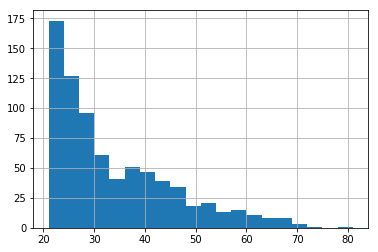

In [23]:
dataset["Age"].hist(bins=20)

In [24]:
age_bucket = tf.feature_column.bucketized_column(age,[20,30,40,50,60,70,80,90])

In [25]:
feat_cols = [num_preg,glucose,bloodpressure,skinthickness,insulin,bmi,DiabetesPedigreeFunction,age_bucket]

In [26]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
# train test split
X_data = dataset.drop("Outcome",axis=1)
y_data = dataset["Outcome"]
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=42)


In [31]:
input_func = tf.estimator.inputs.pandas_input_fn(x= X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [32]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\varun\\AppData\\Local\\Temp\\tmpqhtgyegg', '_session_config': None, '_log_step_count_steps': 100, '_keep_checkpoint_max': 5, '_save_checkpoints_steps': None, '_tf_random_seed': 1, '_save_summary_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600}


In [33]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\varun\AppData\Local\Temp\tmpqhtgyegg\model.ckpt.
INFO:tensorflow:step = 1, loss = 6.93147
INFO:tensorflow:global_step/sec: 457.829
INFO:tensorflow:step = 101, loss = 9.11243 (0.222 sec)
INFO:tensorflow:global_step/sec: 574.785
INFO:tensorflow:step = 201, loss = 15.5482 (0.170 sec)
INFO:tensorflow:global_step/sec: 581.201
INFO:tensorflow:step = 301, loss = 5.7977 (0.176 sec)
INFO:tensorflow:global_step/sec: 596.31
INFO:tensorflow:step = 401, loss = 11.8463 (0.168 sec)
INFO:tensorflow:global_step/sec: 594.732
INFO:tensorflow:step = 501, loss = 4.32489 (0.168 sec)
INFO:tensorflow:global_step/sec: 587.128
INFO:tensorflow:step = 601, loss = 6.60369 (0.172 sec)
INFO:tensorflow:global_step/sec: 588.988
INFO:tensorflow:step = 701, loss = 8.37603 (0.168 sec)
INFO:tensorflow:global_step/sec: 602.514
INFO:tensorflow:step = 801, loss = 6.80599 (0.166 sec)
INFO:tensorflow:global_step/sec: 574.031
INFO

In [35]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [36]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-06-29-01:33:55
INFO:tensorflow:Restoring parameters from C:\Users\varun\AppData\Local\Temp\tmpqhtgyegg\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-06-29-01:33:56
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.704724, accuracy_baseline = 0.661417, auc = 0.716777, auc_precision_recall = 0.558067, average_loss = 0.64159, global_step = 1000, label/mean = 0.338583, loss = 6.26784, prediction/mean = 0.270399


In [37]:
results

{'accuracy': 0.70472443,
 'accuracy_baseline': 0.66141737,
 'auc': 0.71677738,
 'auc_precision_recall': 0.55806661,
 'average_loss': 0.64159042,
 'global_step': 1000,
 'label/mean': 0.33858266,
 'loss': 6.2678447,
 'prediction/mean': 0.27039933}

In [38]:
feat_cols2 = [num_preg,glucose,bloodpressure,skinthickness,insulin,bmi,DiabetesPedigreeFunction,age]
model2 = tf.estimator.LinearClassifier(feature_columns=feat_cols2,n_classes=2)
model.train(input_fn=input_func,steps=1000)
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)
results = model.evaluate(eval_input_func)
results

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\varun\\AppData\\Local\\Temp\\tmpke7wl8if', '_session_config': None, '_log_step_count_steps': 100, '_keep_checkpoint_max': 5, '_save_checkpoints_steps': None, '_tf_random_seed': 1, '_save_summary_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:\Users\varun\AppData\Local\Temp\tmpqhtgyegg\model.ckpt-1000
INFO:tensorflow:Saving checkpoints for 1001 into C:\Users\varun\AppData\Local\Temp\tmpqhtgyegg\model.ckpt.
INFO:tensorflow:step = 1001, loss = 7.04428
INFO:tensorflow:global_step/sec: 494.879
INFO:tensorflow:step = 1101, loss = 4.54416 (0.202 sec)
INFO:tensorflow:global_step/sec: 546.81
INFO:tensorflow:step = 1201, loss = 3.88212 (0.187 sec)
INFO:tensorflow:global_step/sec: 547.064
INFO:tensorflow:step = 1301, loss = 3.65234 (0.179 sec)
INFO:tensorflow:global_step/sec: 528

{'accuracy': 0.74015749,
 'accuracy_baseline': 0.66141737,
 'auc': 0.78190744,
 'auc_precision_recall': 0.59595108,
 'average_loss': 0.54709792,
 'global_step': 2000,
 'label/mean': 0.33858266,
 'loss': 5.3447261,
 'prediction/mean': 0.36004856}

### Tensorflow Linear classifier - models accuracy 70.47%  and 74.01%

## Model - 5  Dense Neural network

In [44]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,20,20,20,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\varun\\AppData\\Local\\Temp\\tmp_9q54h09', '_session_config': None, '_log_step_count_steps': 100, '_keep_checkpoint_max': 5, '_save_checkpoints_steps': None, '_tf_random_seed': 1, '_save_summary_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600}


In [45]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\varun\AppData\Local\Temp\tmp_9q54h09\model.ckpt.
INFO:tensorflow:step = 1, loss = 9.9196
INFO:tensorflow:global_step/sec: 397.874
INFO:tensorflow:step = 101, loss = 8.21494 (0.299 sec)
INFO:tensorflow:global_step/sec: 358.628
INFO:tensorflow:step = 201, loss = 6.00786 (0.246 sec)
INFO:tensorflow:global_step/sec: 463.557
INFO:tensorflow:step = 301, loss = 4.89496 (0.217 sec)
INFO:tensorflow:global_step/sec: 466.576
INFO:tensorflow:step = 401, loss = 7.47783 (0.220 sec)
INFO:tensorflow:global_step/sec: 465.349
INFO:tensorflow:step = 501, loss = 9.44225 (0.202 sec)
INFO:tensorflow:global_step/sec: 493.139
INFO:tensorflow:step = 601, loss = 6.15443 (0.202 sec)
INFO:tensorflow:global_step/sec: 510.835
INFO:tensorflow:step = 701, loss = 5.99993 (0.200 sec)
INFO:tensorflow:global_step/sec: 462.638
INFO:tensorflow:step = 801, loss = 6.38442 (0.212 sec)
INFO:tensorflow:global_step/sec: 419.764
INF

In [42]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [43]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-06-29-01:46:44
INFO:tensorflow:Restoring parameters from C:\Users\varun\AppData\Local\Temp\tmpk23328oi\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-06-29-01:46:45
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.700787, accuracy_baseline = 0.661417, auc = 0.714424, auc_precision_recall = 0.541349, average_loss = 0.584578, global_step = 1000, label/mean = 0.338583, loss = 5.71088, prediction/mean = 0.37494


{'accuracy': 0.70078743,
 'accuracy_baseline': 0.66141737,
 'auc': 0.71442419,
 'auc_precision_recall': 0.5413487,
 'average_loss': 0.58457798,
 'global_step': 1000,
 'label/mean': 0.33858266,
 'loss': 5.7108769,
 'prediction/mean': 0.37494037}